In [25]:
#* Predicting profits of startups

# NOTE: Using different Regrestion Models

# Importing modules

# Importing modules
import pandas as pd # data read and manipulation
import numpy as np # arrays
import matplotlib.pyplot as plt # ploting the data

# Importing modules for ML
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.pipeline import Pipeline # for defining pipelines
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# importing models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# using the grid search for hyperparmeter tuning
from sklearn.model_selection import GridSearchCV

# Importing other needed models
import os

In [2]:
#* DATA

# Loading data
data_path = os.path.join("datasets","Startup_prediction","50_Startups.csv")
startup_data = pd.read_csv(data_path)


In [5]:
# Exploring the data set

def exploring_data(data):
    
    print("Data preview")
    print(data.head())
    print(" ")
    print("Data info")
    print(data.info())
    print(" ")
    print("Checking to see if there is a NaN values in the dataset")
    print(data.isnull().values.any())
    print(" ")
    print("Seaing the numerical values in the data set")
    print(data.describe())

In [6]:
# exploring the data set
exploring_data(startup_data)

Data preview
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
 
Data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
 
Checking to see if there is a NaN values in the dataset
False
 
Seaing the num

In [ ]:
# Conclustions about the data set:
# small data set
# 4 attributes, 3 numerical, 1 categorical

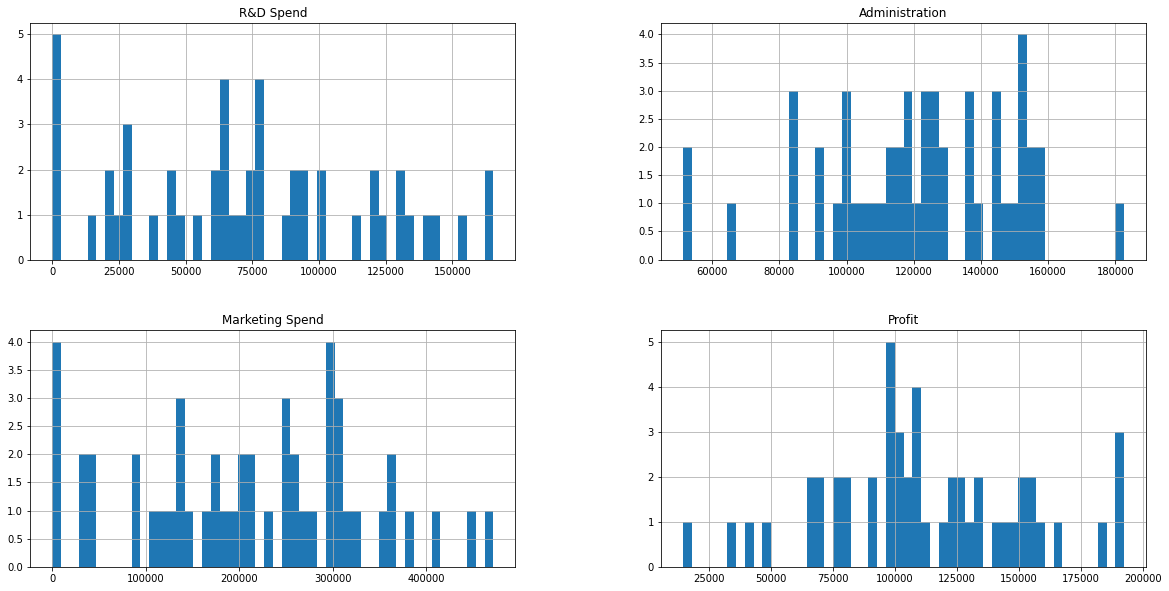

In [7]:
# Ploting the histogram
startup_data.hist(bins=50, figsize=(20, 10))
plt.show()

In [8]:
#* Spliting data - exploring the train and test data
startup_train_set, startup_test_set = train_test_split(startup_data, test_size=0.2, random_state=42)

In [10]:
print(len(startup_train_set))
print(len(startup_test_set))

40
10


In [12]:
# Seeing how well the data is represented in train and test data set
startup_train_set["State"].value_counts() / len(startup_train_set)

Florida       0.350
New York      0.325
California    0.325
Name: State, dtype: float64

In [13]:
startup_test_set["State"].value_counts() / len(startup_train_set)

New York      0.10
California    0.10
Florida       0.05
Name: State, dtype: float64

In [14]:
# exploring just the categorical data
startup_data["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

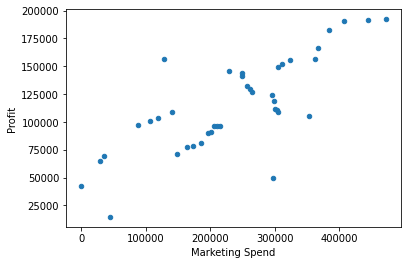

In [15]:
#* Discover and visualize the data
startup_train_set.plot(kind = "scatter", x = "Marketing Spend", y = "Profit")


In [16]:
# Looking for corelations in the data
corr_matrix = startup_train_set.corr()
print(corr_matrix)

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.156385         0.746371  0.973030
Administration    0.156385        1.000000        -0.101476  0.090235
Marketing Spend   0.746371       -0.101476         1.000000  0.773753
Profit            0.973030        0.090235         0.773753  1.000000


In [17]:
# Corelations just for the Profit
print(corr_matrix["Profit"])

R&D Spend          0.973030
Administration     0.090235
Marketing Spend    0.773753
Profit             1.000000
Name: Profit, dtype: float64


In [18]:
#* Preparing a data for ML training

# deviding data to train and labels
# train data
startup_train = startup_train_set.drop(["Profit"], axis=1)
startup_train_labels = startup_train_set["Profit"]

# test data
startup_test = startup_test_set.drop(["Profit"], axis=1)
startup_test_labels = startup_test_set["Profit"]

In [19]:
# checking the data
startup_train.head()

,R&D Spend,Administration,Marketing Spend,State
12,93863.75,127320.38,249839.44,Florida
4,142107.34,91391.77,366168.42,Florida
37,44069.95,51283.14,197029.42,California
8,120542.52,148718.95,311613.29,New York
3,144372.41,118671.85,383199.62,New York


In [20]:
# checking the data
startup_train_labels.head()

12    141585.52
4     166187.94
37     89949.14
8     152211.77
3     182901.99
Name: Profit, dtype: float64

In [23]:
#* Transforming the data

# getting the numerical attributes
startup_train_num = startup_train.drop(["State"], axis=1)
num_attributes = list(startup_train_num)
print(num_attributes)
cat_attributes = ["State"]
print(cat_attributes)

['R&D Spend', 'Administration', 'Marketing Spend']
['State']


In [26]:
# bulind a numerical transformation pipeline
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])

In [27]:
# preparing the data
startup_train_pr = full_pipeline.fit_transform(startup_train)

In [29]:
# printing just first row to see the data
startup_train_pr[0,:]

array([0.34202149, 0.22787678, 0.12425038, 0.        , 1.        ,
       0.        ])

In [49]:
#* Selecting and training the Model

# Linear Regression
lin_reg = LinearRegression()

# fiting the model - train data
lin_reg.fit(startup_train_pr, startup_train_labels)

# predictions
startup_tr_pred = lin_reg.predict(startup_train_pr)

# evaluating the model - train data
def evaluate_model(labels_true, labels_pred, data_train, model):
    model_reg_mse = mean_squared_error(labels_true, labels_pred)
    model_rmse = np.sqrt(model_reg_mse)
    model_score = model.score(data_train, labels_true)
    print("Fitted mode")
    print("RMSE: ", model_rmse)
    print("Score: ", model_score)
    return model_rmse, model_score

# evaluating the model - train data
lin_rmse, lin_socore = evaluate_model(startup_train_labels, startup_tr_pred, startup_train_pr, lin_reg)

Fitted mode
RMSE:  8927.489013300055
Score:  0.9537019995248526


In [50]:
# evaluating a model - test data
startup_test_pr = full_pipeline.transform(startup_test)
startup_test_pred = lin_reg.predict(startup_test_pr)
lin_rmse_T, lin_socore_T = evaluate_model(startup_test_labels, startup_test_pred, startup_test_pr, lin_reg)

Fitted mode
RMSE:  9055.957323497802
Score:  0.8987266414319839


In [51]:
# Doing cross validation
lin_reg_crossvalid = cross_val_score(lin_reg, startup_train_pr, startup_train_labels, scoring="neg_mean_squared_error", cv=10)

# evaluating a model with rmse
lin_rmse_scores = np.sqrt(-lin_reg_crossvalid)

# function for printing results
def disply_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

disply_scores(lin_rmse_scores)

Scores:  [ 8009.25077294  8646.33675924 10791.25375596  7241.86449402
  8021.98497625  9901.65048716  8669.23660064  6304.10521255
 19007.15644331 12723.57153486]
Mean:  9931.641103692124
Standard deviation:  3491.155194325467


In [52]:
# Decision Tree Model
tree_reg = DecisionTreeRegressor()

# fiting the model - train data
tree_reg.fit(startup_train_pr, startup_train_labels)

# predictions
startup_tr_pred = tree_reg.predict(startup_train_pr)

# evaluating the model - train data
tree_rmse, tree_score = evaluate_model(startup_train_labels, startup_tr_pred, startup_train_pr, tree_reg)

# Doing cross validation
tree_reg_crossvalid = cross_val_score(tree_reg, startup_train_pr, startup_train_labels, scoring="neg_mean_squared_error", cv=10)

# evaluating a model with rmse
tree_rmse_scores = np.sqrt(-tree_reg_crossvalid)

disply_scores(tree_rmse_scores)

Fitted mode
RMSE:  0.0
Score:  1.0
Scores:  [15262.89251068 22266.95861282 15983.10123598  9947.92055643
  5786.29532847  6624.37641353 14873.10249794  7703.70653885
 16954.67762088 11842.03573371]
Mean:  12724.506704927766
Standard deviation:  4996.779219959428


In [53]:
# evaluating a model - test data
startup_test_pred = tree_reg.predict(startup_test_pr)
tree_rmse_T, tree_score_T = evaluate_model(startup_test_labels, startup_test_pred, startup_test_pr, tree_reg)

Fitted mode
RMSE:  10615.570514325645
Score:  0.8608404045865723


In [81]:
# Random Forest
rfor_reg = RandomForestRegressor()

# fiting the model - train data
rfor_reg.fit(startup_train_pr, startup_train_labels)

# predictions
startup_tr_pred = rfor_reg.predict(startup_train_pr)

# evaluating the model - train data
forest_rmse, forest_score = evaluate_model(startup_train_labels, startup_tr_pred, startup_train_pr, rfor_reg)

# Doing cross validation
rfor_reg_crossvalid = cross_val_score(tree_reg, startup_train_pr, startup_train_labels, scoring="neg_mean_squared_error", cv=10)

# evaluating a model with rmse
rfor_rmse_scores = np.sqrt(-rfor_reg_crossvalid)

disply_scores(rfor_rmse_scores)

Fitted mode
RMSE:  3876.947444237982
Score:  0.9912686094621392
Scores:  [17201.83792864 21699.05191796 14978.88083581  9632.04291411
  4176.20694393  5146.39889337 10408.43043844  7995.94141912
 18407.07176933 11842.03573371]
Mean:  12148.789879442545
Standard deviation:  5506.495977695735


In [83]:
# evaluating a model - test data
startup_test_pred = rfor_reg.predict(startup_test_pr)
forest_rmse_T, forest_score_T = evaluate_model(startup_test_labels, startup_test_pred, startup_test_pr, rfor_reg)

Fitted mode
RMSE:  7960.306308373581
Score:  0.9217496952842822


In [65]:
#* Hyperparameter tuning using Grid search

param_grid = [
    {'n_estimators': [3, 10, 20, 30, 40, 50, 100], 'max_features': [2, 4, 6]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# defining a model
forest_reg = RandomForestRegressor()

# defining a grid search to explore different hyperparameters
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# training the model
grid_search.fit(startup_train_pr, startup_train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 20, 30, 40, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [66]:
# seeing the best parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 10}

In [67]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=10)

In [68]:
cvres = grid_search.cv_results_

In [69]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

21240.986528890982 {'max_features': 2, 'n_estimators': 3}
18593.269708488267 {'max_features': 2, 'n_estimators': 10}
18550.302204923915 {'max_features': 2, 'n_estimators': 20}
18720.547902504295 {'max_features': 2, 'n_estimators': 30}
17732.87947154719 {'max_features': 2, 'n_estimators': 40}
17454.405380065553 {'max_features': 2, 'n_estimators': 50}
16895.921555298435 {'max_features': 2, 'n_estimators': 100}
17449.627771501364 {'max_features': 4, 'n_estimators': 3}
13326.966292517232 {'max_features': 4, 'n_estimators': 10}
12213.24983211263 {'max_features': 4, 'n_estimators': 20}
11503.462126857023 {'max_features': 4, 'n_estimators': 30}
11703.172178512417 {'max_features': 4, 'n_estimators': 40}
11844.112676337736 {'max_features': 4, 'n_estimators': 50}
12569.632889558117 {'max_features': 4, 'n_estimators': 100}
14127.957358091577 {'max_features': 6, 'n_estimators': 3}
9608.182905369726 {'max_features': 6, 'n_estimators': 10}
10187.765745161994 {'max_features': 6, 'n_estimators': 20}
1

In [72]:
# Testing out the model
model_best = grid_search.best_estimator_

# predictions
startup_tr_pred = model_best.predict(startup_train_pr)

# evaluating the model - train data
forest_rmse_gs, forest_score_gs = evaluate_model(startup_train_labels, startup_tr_pred, startup_train_pr, model_best)

Fitted mode
RMSE:  5023.862994259426
Score:  0.9853384744765278


In [73]:
# evaluating a model - test data
startup_test_pred = model_best.predict(startup_test_pr)
forest_rmse_gsT, forest_score_gsT = evaluate_model(startup_test_labels, startup_test_pred, startup_test_pr, model_best)

Fitted mode
RMSE:  9132.439695501245
Score:  0.8970088032459379


In [78]:
list_models = ['Linear Regression', 'Decision Tree', 'Random Forest']
rmse_all_train = [lin_rmse, tree_rmse, forest_rmse]
scoress_all_train = [lin_socore, tree_score, forest_score]
rmse_all_test = [lin_rmse_T, tree_rmse_T, forest_rmse_T]
scoress_all_test = [lin_socore_T, tree_score_T, forest_score_T]
results = pd.DataFrame({'Model': list_models, 'RMSE Train data': rmse_all_train, 'Scores Train data': scoress_all_train, 
                        'RMSE Test data': rmse_all_test, 'Scores Test data': scoress_all_test}, 
                       columns=['Model', 'RMSE Train data', 'Scores Train data', 'RMSE Test data', 'Scores Test data'])

In [80]:
results

,Model,RMSE Train data,Scores Train data,RMSE Test data,Scores Test data
0,Linear Regression,8927.489013,0.953702,9055.957323,0.898727
1,Decision Tree,0.000000,1.000000,10615.570514,0.860840
2,Random Forest,3909.383034,0.991122,8467.899816,0.911452


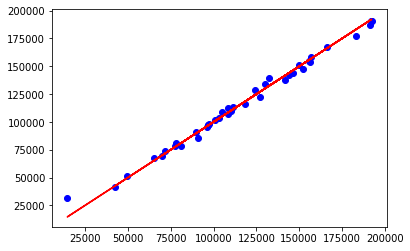

In [82]:
# Ploting the train data - Random Forest
plt.scatter(startup_train_labels, startup_tr_pred, color="b")
plt.plot(startup_train_labels, startup_train_labels, color="r")
plt.show()

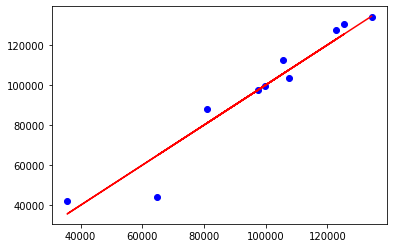

In [84]:
# Ploting the test data - Random Forest
plt.scatter(startup_test_labels, startup_test_pred, color="b")
plt.plot(startup_test_labels, startup_test_labels, color="r")
plt.show()